In [2]:
import pandas as pd
dataset=pd.read_csv("Titanic-Dataset.csv")
df=pd.DataFrame(dataset)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
df['Age']=df['Age'].fillna(method="ffill")

C:\Users\Deepika\AppData\Local\Temp\ipykernel_22608\958125670.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age']=df['Age'].fillna(method="ffill")


In [7]:
df['Age'] = df['Age'].ffill()

In [8]:
df['Age'] = df['Age'].bfill()

In [9]:
df['Cabin']=df['Cabin'].fillna('unknown',limit=5)

In [10]:
df=df.drop_duplicates()

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex_encoded']=le.fit_transform(df['Sex'])
print(df[['Sex','sex_encoded']].head())

      Sex  sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


In [14]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
df['fare_scaled']=scalar.fit_transform(df[['Fare']])
print(df[['Fare','fare_scaled']].head())

      Fare  fare_scaled
0   7.2500    -0.502445
1  71.2833     0.786845
2   7.9250    -0.488854
3  53.1000     0.420730
4   8.0500    -0.486337


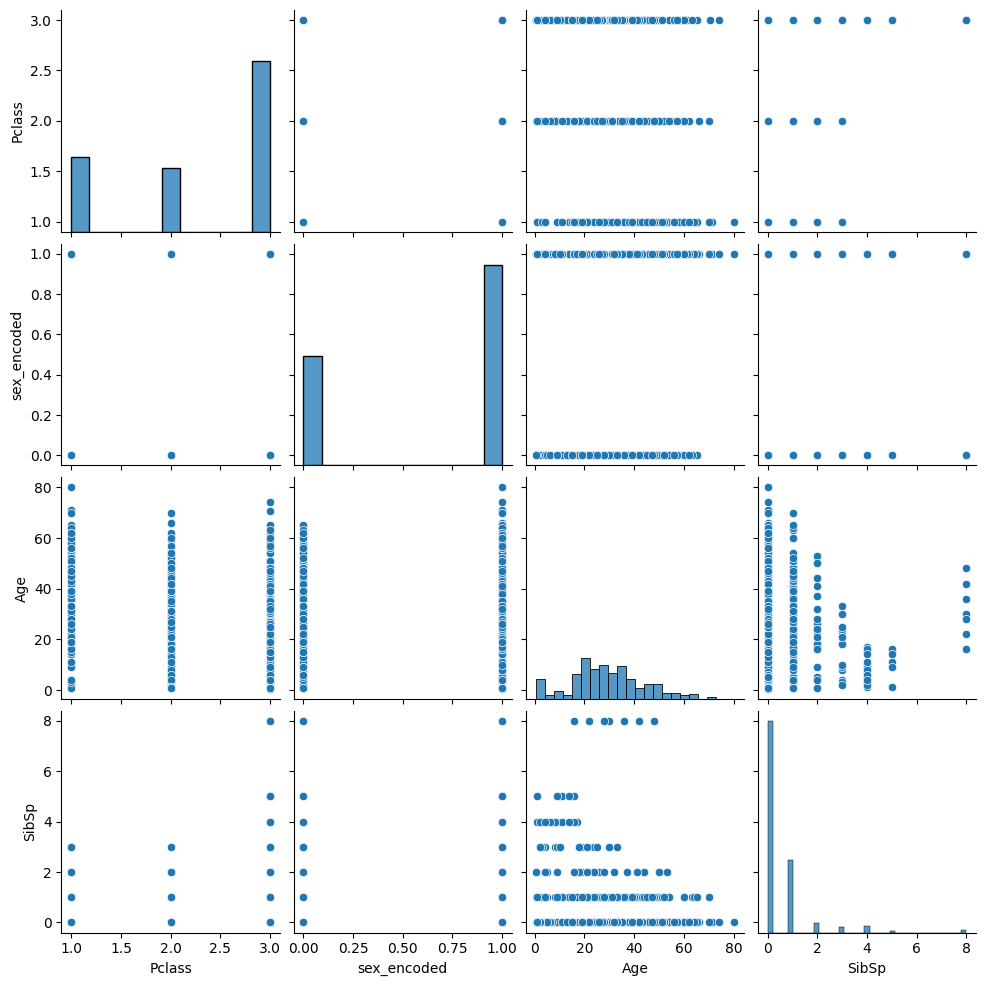

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df[['Pclass','sex_encoded','Age','SibSp']].dropna())
plt.show()

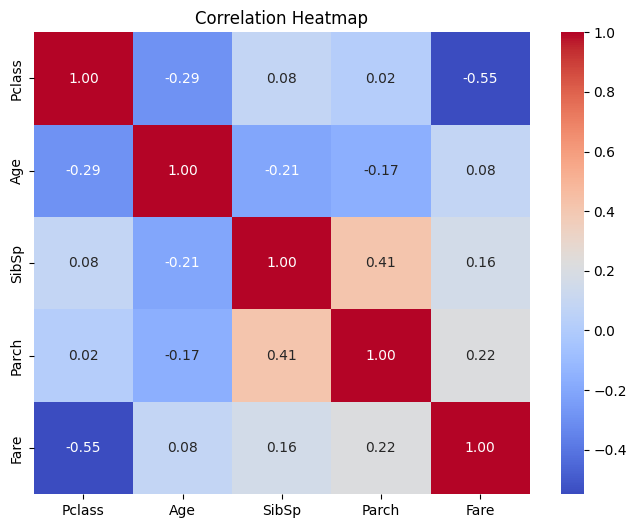

In [16]:
corr_fea=['Pclass','Age','SibSp','Parch','Fare']
corr=df[corr_fea].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()